In [1]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt 
import json   as j 

# 
import seaborn as sns 
import folium  as f 

import warnings
warnings.filterwarnings('ignore')

print('numpy   version , ' , np.__version__)
print('pandnas version , ' , pd.__version__)

%matplotlib inline

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False    
    
import warnings
warnings.filterwarnings(action='ignore')    


numpy   version ,  1.24.3
pandnas version ,  1.5.3


- seaborn

In [5]:
print('auto-mpg.csv')
mpgFrm = pd.read_csv('./data/auto-mpg.csv' , header = None)
mpgFrm.head()

auto-mpg.csv


,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [7]:
mpgFrm.columns=['mpg' , 'cyl', 'displ', 'horsepower', 
                'weight', 'acc', 'model year', 'origin' , 'model']

In [8]:
mpgFrm.head()

,mpg,cyl,displ,horsepower,weight,acc,model year,origin,model
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [17]:
print('pie chart - ') 
# mpgFrm['origin'].unique()
# mpgFrm.describe()
mpgFrm['cnt'] = 1 
mpgFrm.head()

pie chart - 


,mpg,cyl,displ,horsepower,weight,acc,model year,origin,model,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1


In [22]:
print('국가별 차량의 총 합 - ') 
grpFrm = mpgFrm.groupby('origin').sum()

국가별 차량의 총 합 - 


In [27]:
grpFrm.index = ['미국', '대한민국', '일본']
grpFrm

,mpg,cyl,displ,weight,acc,model year,cnt
미국,5000.8,1556,61229.5,837121.0,3743.4,18827,249
대한민국,1952.4,291,7640.0,169631.0,1175.1,5307,70
일본,2405.6,324,8114.0,175477.0,1277.6,6118,79


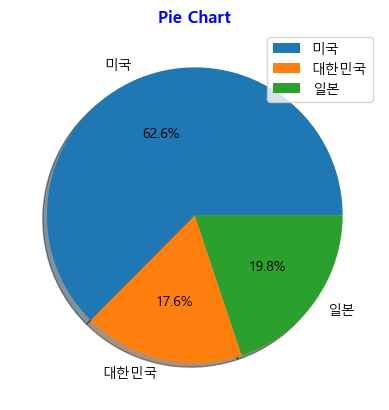

In [36]:
plt.figure()

plt.pie(grpFrm['cnt'] , labels = grpFrm.index , 
        shadow  = True , 
        autopct = '%1.1f%%')

plt.title('Pie Chart' , weight = 'bold' , color = 'blue')
plt.legend(loc = 'best')
plt.show()
plt.close()

In [39]:
titanicFrm = sns.load_dataset('titanic') 
titanicFrm.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
print('선실별 승객 수의 비율(Pie)을 시각화 한다면 - ') 
titanicFrm['pclass'].value_counts()
print('index - ' , titanicFrm['pclass'].value_counts().index)
print('index - ' , titanicFrm['pclass'].value_counts().values)

선실별 승객 수의 비율(Pie)을 시각화 한다면 - 
index -  Int64Index([3, 1, 2], dtype='int64')
index -  [491 216 184]


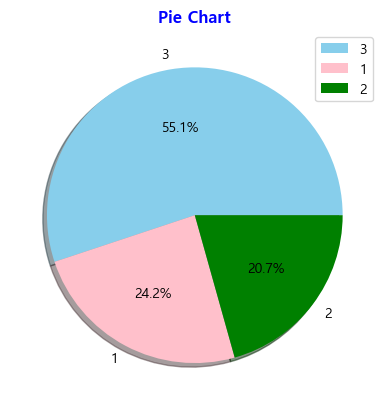

In [46]:
plt.figure()

plt.pie(titanicFrm['pclass'].value_counts().values , 
        labels = titanicFrm['pclass'].value_counts().index , 
        shadow  = True , 
        autopct = '%1.1f%%' , 
        colors  = ['skyblue' , 'pink' , 'green'])

plt.title('Pie Chart' , weight = 'bold' , color = 'blue')
plt.legend(loc = 'best')
plt.show()
plt.close()

sns barplot

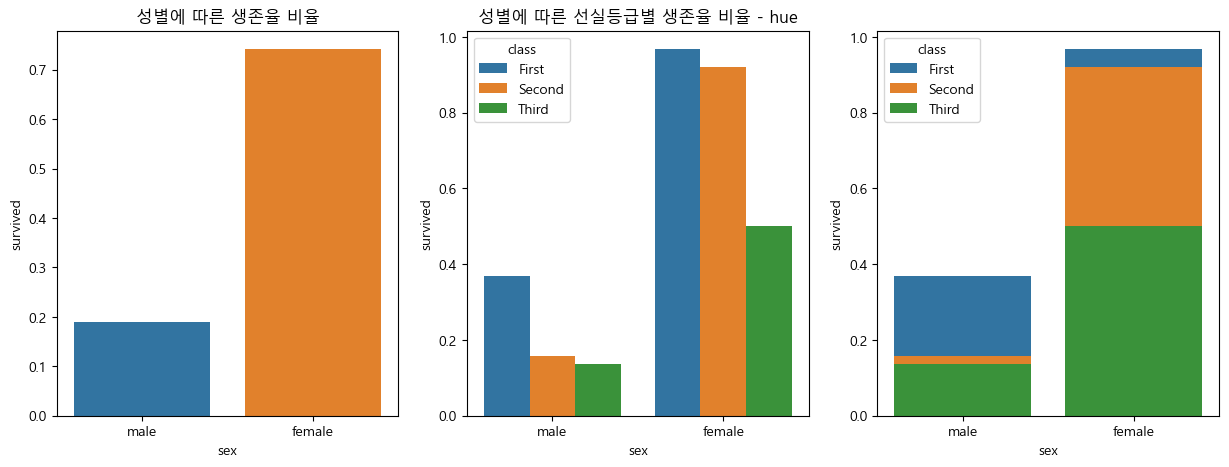

In [58]:
fig = plt.figure(figsize = (15, 5)) 

ax01 = fig.add_subplot(1,3,1)
ax01.set_title('성별에 따른 생존율 비율')
sns.barplot(ax = ax01 , data = titanicFrm , x = 'sex' , y = 'survived' , ci=None)


ax02 = fig.add_subplot(1,3,2)
ax02.set_title('성별에 따른 선실등급별 생존율 비율 - hue')
sns.barplot(ax = ax02 , data = titanicFrm , 
            x = 'sex' , y = 'survived' , ci=None , 
            hue = 'class')

ax03 = fig.add_subplot(1,3,3)
sns.barplot(ax = ax03 , data = titanicFrm , 
            x = 'sex' , y = 'survived' , ci=None , 
            hue = 'class' , 
            dodge = False)


plt.show()
plt.close()

In [53]:
print('성별에 따른 생존율 비율 - ') 
titanicFrm.groupby('sex')['survived'].mean()

성별에 따른 생존율 비율 - 


sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [57]:
print('성별에 따른 선실등급별 생존율 비율')
titanicFrm.groupby(['sex', 'class'])['survived'].mean()

성별에 따른 선실등급별 생존율 비율


sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [61]:
tipFrm = sns.load_dataset('tips')
tipFrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


요일별 평균 팁 , 요일별 매출평균


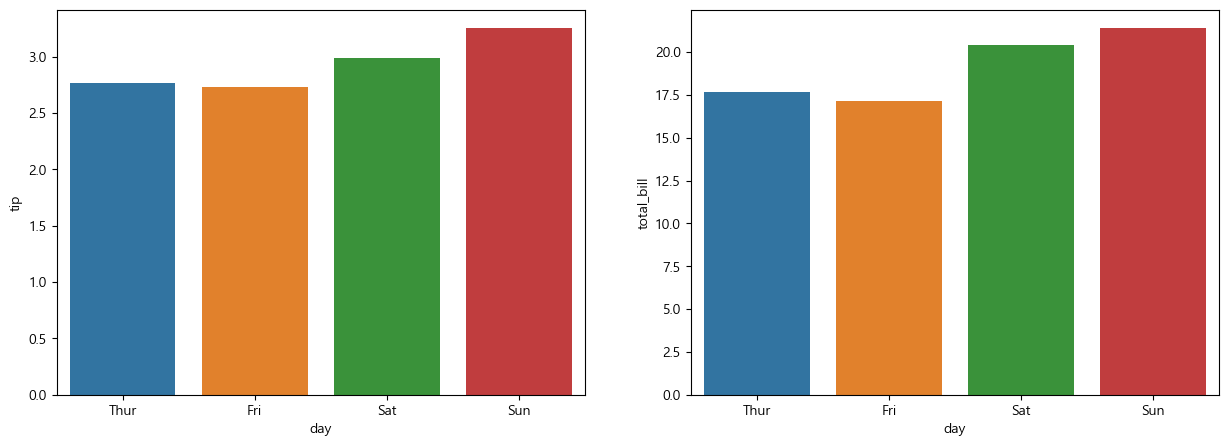

In [68]:
print('요일별 평균 팁 , 요일별 매출평균') 
fig = plt.figure(figsize = (15, 5)) 

ax01 = fig.add_subplot(1,2,1)
sns.barplot(ax = ax01 , data = tipFrm , 
            x = 'day' , y = 'tip' , ci = None)
ax02 = fig.add_subplot(1,2,2)
sns.barplot(ax = ax02 , data = tipFrm , 
            x = 'day' , y = 'total_bill' , ci = None)


plt.show()
plt.close()

In [65]:
tipFrm.groupby('day')['tip'].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

- countplot

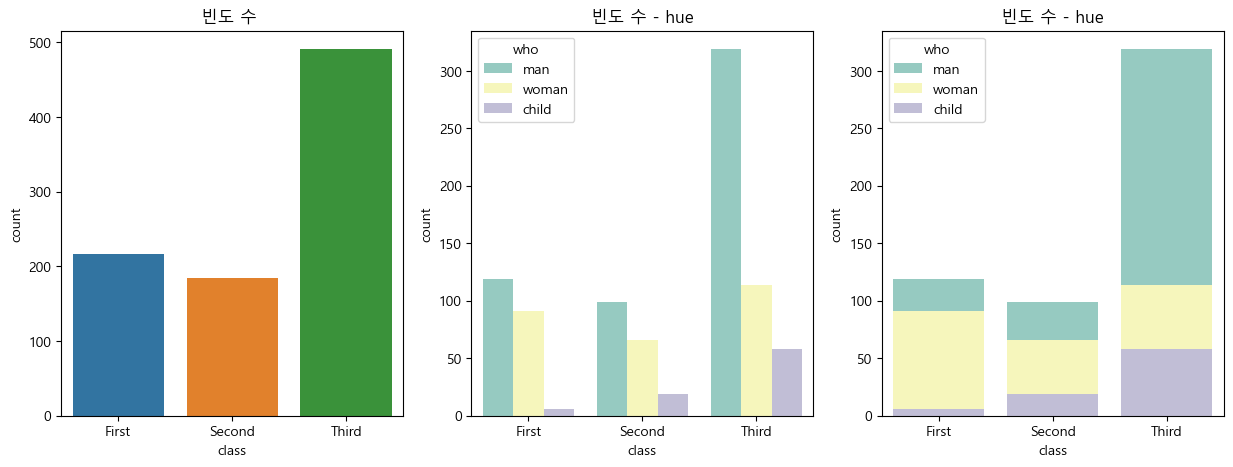

In [85]:
fig = plt.figure(figsize = (15, 5)) 

ax01 = fig.add_subplot(1,3,1)
ax01.set_title('빈도 수 ')
sns.countplot(ax = ax01 , data = titanicFrm , x = 'class' )


ax02 = fig.add_subplot(1,3,2)
ax02.set_title('빈도 수 - hue')
sns.countplot(ax = ax02 , data = titanicFrm , 
              x = 'class' , hue = 'who' , palette = 'Set3')

ax03 = fig.add_subplot(1,3,3)
ax03.set_title('빈도 수 - hue')
sns.countplot(ax = ax03 , data = titanicFrm , 
              x = 'class' , hue = 'who' , palette = 'Set3' , dodge = False)


plt.show()
plt.close()

In [82]:
titanicFrm['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

요일별로 팁을 준 빈도를 시각화 - 


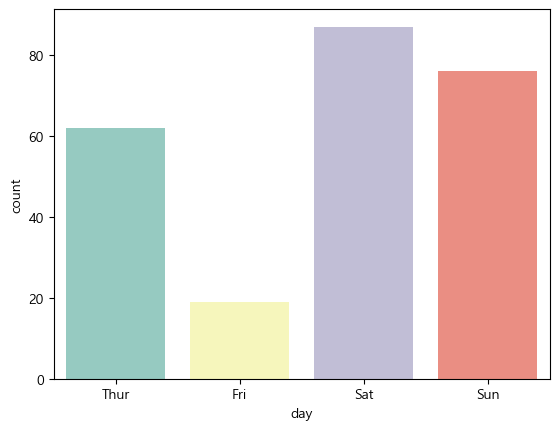

In [90]:
print('요일별로 팁을 준 빈도를 시각화 - ') 
# tipFrm['day'].value_counts()
plt.figure()

sns.countplot(data = tipFrm , x = 'day' , palette = 'Set3')

plt.show()
plt.close()


- stripplot : 모든 데이터를 점으로 시각화

요일별로 매출을 시각화 - 


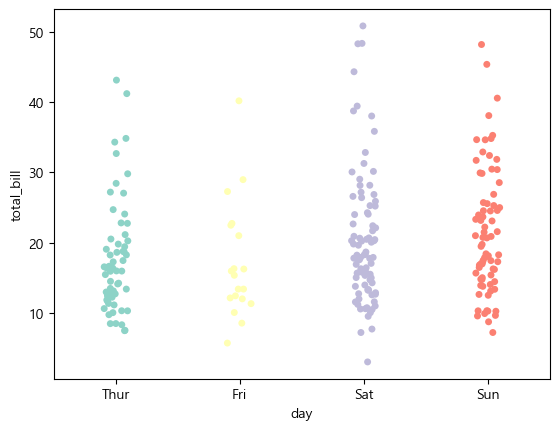

In [93]:
print('요일별로 매출을 시각화 - ') 
plt.figure()

sns.stripplot(data = tipFrm , x = 'day' , y = 'total_bill' , 
              palette = 'Set3' , 
              jitter = True)

plt.show()
plt.close()

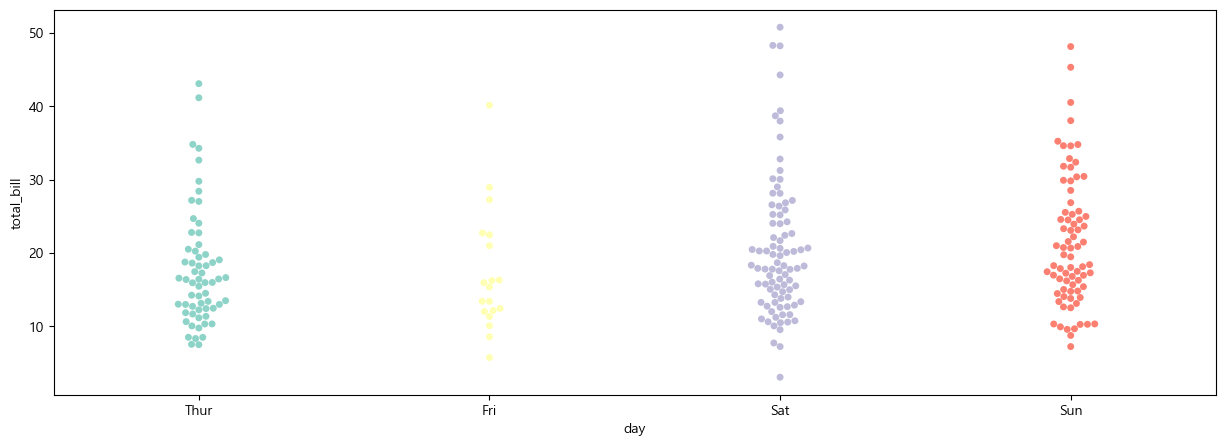

In [95]:
plt.figure(figsize = (15, 5))

sns.swarmplot(data = tipFrm , x = 'day' , y = 'total_bill' , 
              palette = 'Set3' )

plt.show()
plt.close()

타이타닉을 이용해서 서브플롯으로 2개의 영역을 만들고
class 별 나이분포를 시각화 - strip, swarm


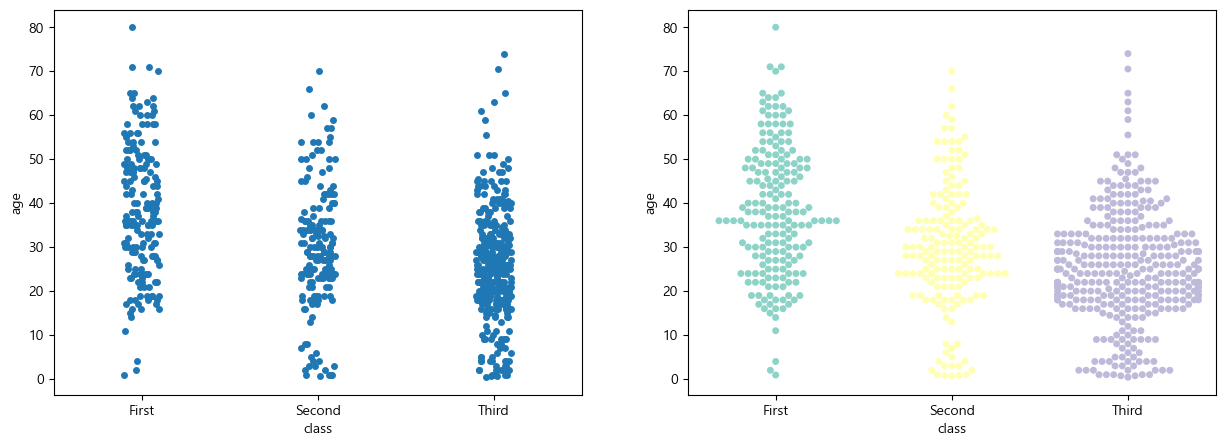

In [96]:
print('타이타닉을 이용해서 서브플롯으로 2개의 영역을 만들고')
print('class 별 나이분포를 시각화 - strip, swarm')

fig = plt.figure(figsize = (15, 5)) 

ax01 = fig.add_subplot(1,2,1)
sns.stripplot(ax = ax01 , data = titanicFrm , x = 'class' , y='age' , jitter = True )


ax02 = fig.add_subplot(1,2,2)
sns.swarmplot(ax = ax02 , data = titanicFrm , 
              x = 'class' , y = 'age' , palette = 'Set3')


plt.show()
plt.close()



- boxplot , violinplot

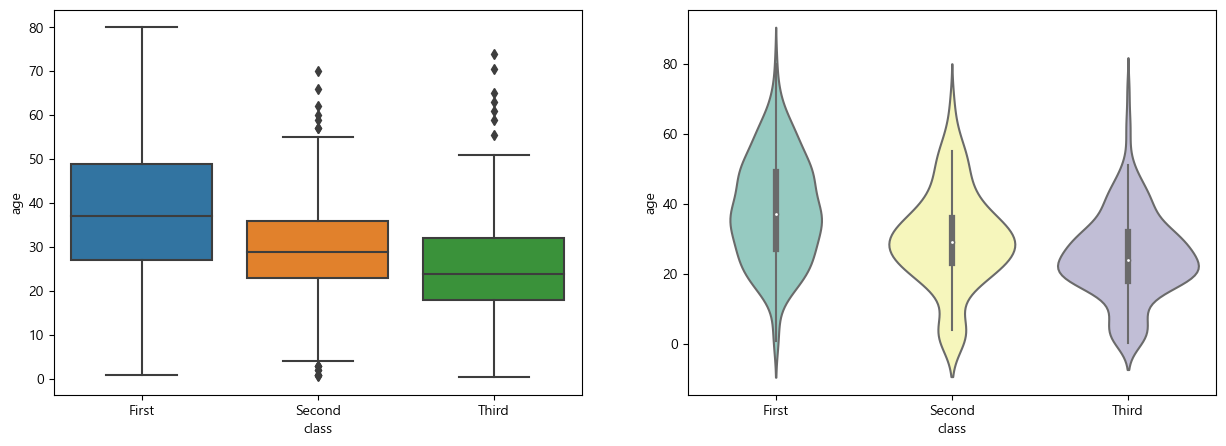

In [99]:
fig = plt.figure(figsize = (15, 5)) 

ax01 = fig.add_subplot(1,2,1)
sns.boxplot(ax = ax01 , data = titanicFrm , x = 'class' , y='age' )


ax02 = fig.add_subplot(1,2,2)
sns.violinplot(ax = ax02 , data = titanicFrm , 
              x = 'class' , y = 'age' , palette = 'Set3')


plt.show()
plt.close()

- heatmap 

In [107]:
print('성별에 따른 선실등급의 인원 수 합을 구한다면 - 피봇')  
titanicFrm['cnt'] = 1 
table = titanicFrm.pivot_table(index = 'sex' , columns = 'class' , values = 'cnt' , 
                       aggfunc = np.sum)

성별에 따른 선실등급의 인원 수 합을 구한다면 - 피봇


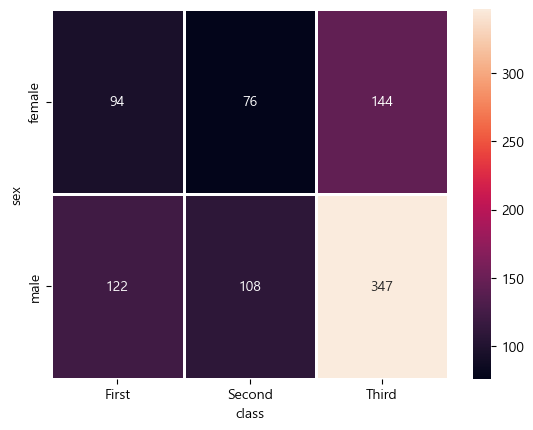

In [117]:
sns.heatmap(table , annot = True , fmt = 'd' , linewidth = 1 , cbar = True)

plt.show()
plt.close()

In [122]:
flightFrm = sns.load_dataset('flights')
flightFrm

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [125]:
print('인덱스를 월 , 열을 년도로하는 히트맵을 작성한다면 - ') 
table = flightFrm.pivot_table(index = 'month' , 
                              columns = 'year' , 
                              values = 'passengers')
table

인덱스를 월 , 열을 년도로하는 히트맵을 작성한다면 - 


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


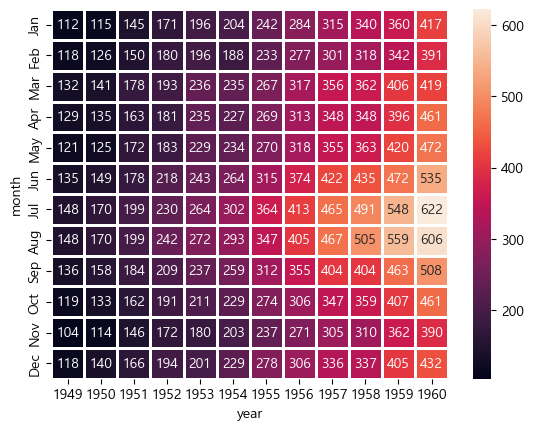

In [124]:
sns.heatmap(table , annot = True , fmt = 'd' , linewidth = 1 , cbar = True)

plt.show()
plt.close()

pairplot() : 상관관계를 시각화하는 함수 
- 상관분석 : 두 확률변수간의 관계를 지수로 표현하는 것
- 상관계수(관련성의 정도) : -1 ~ 1

In [129]:
irisFrm = sns.load_dataset('iris') 
irisFrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


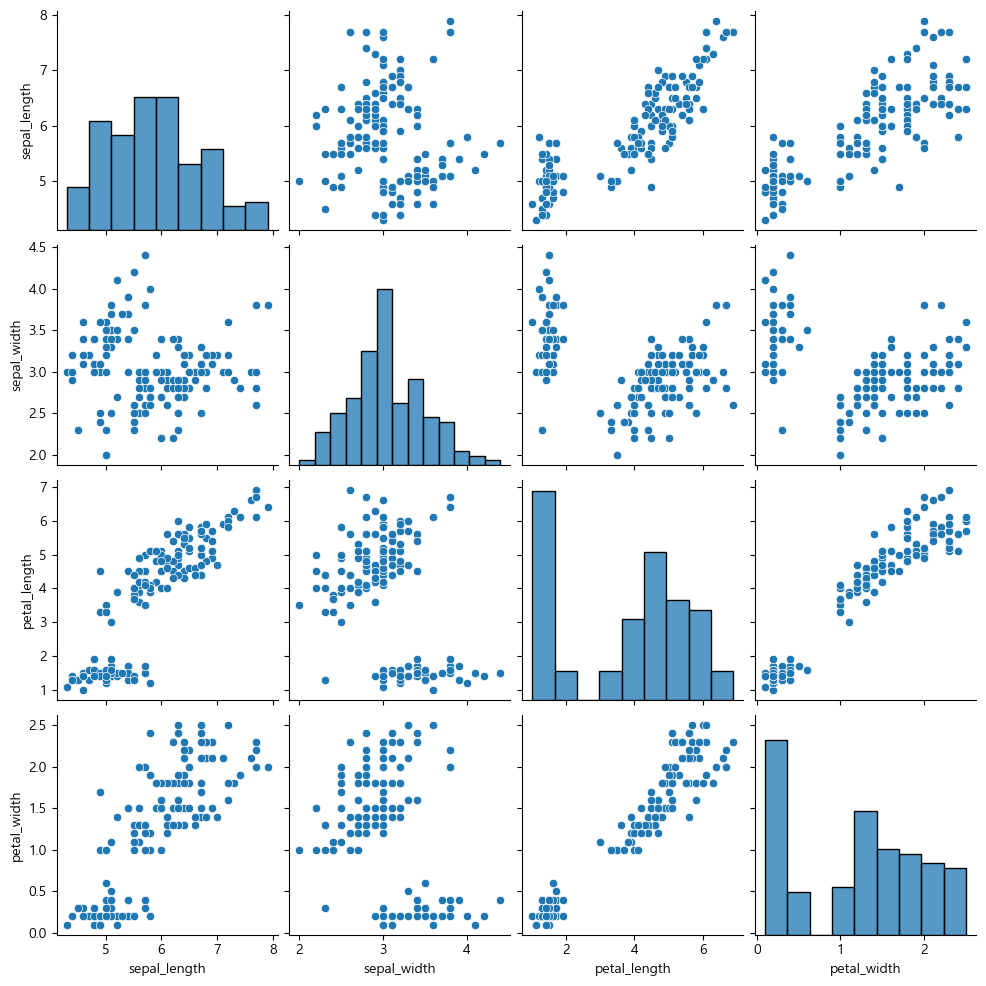

In [131]:
sns.pairplot(irisFrm)

plt.show()
plt.close()

- 지도 시각화 

In [133]:
import folium as g

In [144]:
map = g.Map(location = [35.1133912509959 , 129.01814245590677] , 
            zoom_start = 15)

g.Marker([35.1133912509959 , 129.01814245590677] , 
         popup = '동아대학교').add_to(map)

g.CircleMarker([35.1133912509959 , 129.01814245590677] , 
               radius = 50 , 
               color = 'skyblue').add_to(map)
map

In [148]:
seoulUniFrm = pd.read_excel('./data/서울지역 대학교 위치.xlsx', index_col = 0)
seoulUniFrm.head()

,위도,경도
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [167]:
map = g.Map(location = [37.566589921172444 , 126.97852781644818 ] , 
            zoom_start = 12)

for name in seoulUniFrm.index : 
    # print(name)
    lat = seoulUniFrm.loc[ name , '위도']
    lng = seoulUniFrm.loc[ name , '경도']
    # print(lat, lng)
    g.Marker([lat , lng]  , 
             popup = name , 
             icon  = g.Icon(color = 'red') ).add_to(map)

    g.CircleMarker([lat , lng] , 
               radius = 15 , 
               color = 'skyblue'  , 
               fill_color = 'red').add_to(map)
map

In [155]:
seoulUniFrm.isnull().sum()

위도    0
경도    0
dtype: int64

In [170]:
schoolFrm = pd.read_excel('./data/elem_school_folium.xlsx')
schoolFrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11873 entries, 0 to 11872
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   학교ID      11873 non-null  object 
 1   학교명       11873 non-null  object 
 2   학교급구분     11873 non-null  object 
 3   설립일자      11873 non-null  object 
 4   설립형태      11873 non-null  object 
 5   본교분교구분    11873 non-null  object 
 6   운영상태      11873 non-null  object 
 7   소재지지번주소   11873 non-null  object 
 8   소재지도로명주소  11872 non-null  object 
 9   시도교육청코드   11873 non-null  int64  
 10  시도교육청명    11873 non-null  object 
 11  교육지원청코드   11873 non-null  int64  
 12  교육지원청명    11873 non-null  object 
 13  생성일자      11873 non-null  object 
 14  변경일자      11873 non-null  object 
 15  위도        11873 non-null  float64
 16  경도        11873 non-null  float64
 17  데이터기준일자   11873 non-null  object 
 18  제공기관코드    11873 non-null  int64  
 19  제공기관명     11873 non-null  object 
dtypes: float64(2), int64(3), obj

In [171]:
# schoolFrm.isnull().sum()

학교ID        0
학교명         0
학교급구분       0
설립일자        0
설립형태        0
본교분교구분      0
운영상태        0
소재지지번주소     0
소재지도로명주소    1
시도교육청코드     0
시도교육청명      0
교육지원청코드     0
교육지원청명      0
생성일자        0
변경일자        0
위도          0
경도          0
데이터기준일자     0
제공기관코드      0
제공기관명       0
dtype: int64

In [173]:
schoolFrm.columns

Index(['학교ID', '학교명', '학교급구분', '설립일자', '설립형태', '본교분교구분', '운영상태', '소재지지번주소',
       '소재지도로명주소', '시도교육청코드', '시도교육청명', '교육지원청코드', '교육지원청명', '생성일자', '변경일자',
       '위도', '경도', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [174]:
schoolFrm['학교급구분'].unique()

array(['초등학교', '중학교', '고등학교'], dtype=object)

In [175]:
schoolFrm['시도교육청명'].unique()

array(['서울특별시교육청', '부산광역시교육청', '대구광역시교육청', '인천광역시교육청', '광주광역시교육청',
       '대전광역시교육청', '울산광역시교육청', '경기도교육청', '강원도교육청', '충청북도교육청', '충청남도교육청',
       '세종특별자치시교육청', '전라북도교육청', '전라남도교육청', '경상북도교육청', '경상남도교육청',
       '제주특별자치도교육청'], dtype=object)

In [185]:
# schoolFrm['소재지도로명주소'].str.startswith('서울')
print('학교명, 학교급구분, 소재지도로명주소, 위도, 경도 - subset') 
print('opt01 - 소재지가 부산지역의 초등학교만 추출 - 결측값확인(제거)') 
print('opt02 - 소재지가 부산지역의 서구에 있는 초등학교만 추출 - 결측값확인(제거)') 
print('학교명을 인덱스로 만들어서 지도로 시각화 - ')

학교명, 학교급구분, 소재지도로명주소, 위도, 경도 - subset
opt01 - 소재지가 부산지역의 초등학교만 추출 - 결측값확인(제거)
opt02 - 소재지가 부산지역의 서구에 있는 초등학교만 추출 - 결측값확인(제거)
학교명을 인덱스로 만들어서 지도로 시각화 - 


In [208]:
subset = schoolFrm[['학교명', '학교급구분', '소재지도로명주소', '위도', '경도']]
# condition = (subset['학교급구분'] == '초등학교') 
#              & (subset['소재지도로명주소'].str.startswith('부산'))

condition   = (subset['학교급구분'] == '초등학교') 
               & (subset['소재지도로명주소'].str.startswith('부산') 
               & (subset['소재지도로명주소'].str.contains('서구')))
subset = subset[condition]

In [209]:
subset.set_index('학교명' , inplace = True)

In [210]:
subset.index

Index(['토성초등학교', '부민초등학교', '화랑초등학교', '남부민초등학교', '동신초등학교', '구덕초등학교', '대신초등학교',
       '아미초등학교', '송도초등학교', '천마초등학교', '부산알로이시오초등학교', '명호초등학교', '녹명초등학교',
       '가락초등학교', '대사초등학교', '대상초등학교', '대저초등학교', '덕두초등학교', '배영초등학교', '신호초등학교',
       '천가초등학교', '남명초등학교', '송정초등학교', '녹산초등학교', '오션초등학교', '명일초등학교', '명지초등학교',
       '신명초등학교'],
      dtype='object', name='학교명')

In [211]:
map = g.Map(location = [35.1133912509959 , 129.01814245590677] , 
            zoom_start = 15)

for name in subset.index : 
    # print(name)
    lat = subset.loc[ name , '위도']
    lng = subset.loc[ name , '경도']
    # print(lat, lng)
    try :
        g.Marker([lat , lng]  , 
                 popup = name , 
                 icon  = g.Icon(color = 'red') ).add_to(map)
    except Exception as e : 
        print('위도, 경도 예외발생')
map

In [207]:
subset['소재지도로명주소'].str.contains('서구')

학교명
광일초등학교      False
보수초등학교      False
봉래초등학교      False
남성초등학교      False
토성초등학교       True
            ...  
모전초등학교      False
명일초등학교       True
명지초등학교       True
신명초등학교       True
부산삼육초등학교    False
Name: 소재지도로명주소, Length: 304, dtype: bool

In [217]:
subset['소재지도로명주소'][0].split()[1]

'서구'